In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from concurrent.futures import ThreadPoolExecutor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib

In [2]:
train_dir_path = './Dataset/train'
test_dir_path = './Dataset/test'
train_root_dir = os.listdir(train_dir_path)
test_root_dir = os.listdir(test_dir_path)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [3]:
for subfolder in train_root_dir: 
      subfolder_path = os.path.join(train_dir_path, subfolder) 
      print(subfolder_path)
      if not os.path.isdir(subfolder_path) or subfolder =='train' :
          continue
      for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        train_images.append(image_path)
        train_labels.append(subfolder)
train_df = pd.DataFrame({'image': train_images, 'label': train_labels})
train_df

./Dataset/train\0
./Dataset/train\1
./Dataset/train\2
./Dataset/train\3
./Dataset/train\4
./Dataset/train\5
./Dataset/train\6
./Dataset/train\7
./Dataset/train\8
./Dataset/train\9


,image,label
0,./Dataset/train\0\1428.jpg,0
1,./Dataset/train\0\1429.jpg,0
2,./Dataset/train\0\1433.jpg,0
3,./Dataset/train\0\1434.jpg,0
4,./Dataset/train\0\1435.jpg,0
...,...,...
8545,./Dataset/train\9\fe8c53a9-e0c9-4c87-80db-6508...,9
8546,./Dataset/train\9\fef0e779-ede8-4b78-bd80-57bb...,9
8547,./Dataset/train\9\ff10eb15-746a-4920-ac60-504c...,9
8548,./Dataset/train\9\ff462cf3-6e06-473c-b1f6-aa84...,9


C:\Users\Admin\AppData\Local\Temp\ipykernel_24852\96853626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train_df.label, palette='Set1')


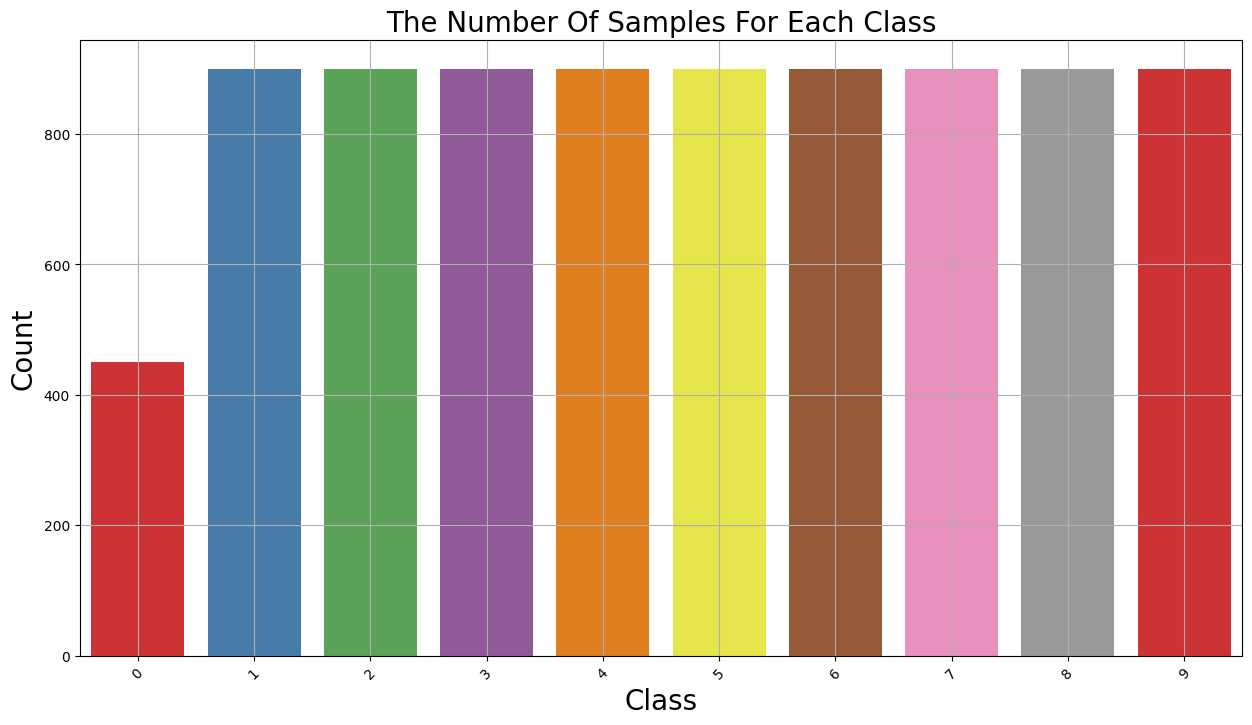

In [4]:
train_df['label'] = pd.Categorical(train_df['label'], categories=sorted(train_df['label'].unique()), ordered=True)

plt.figure(figsize=(15,8))
ax = sns.countplot(x=train_df.label, palette='Set1')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

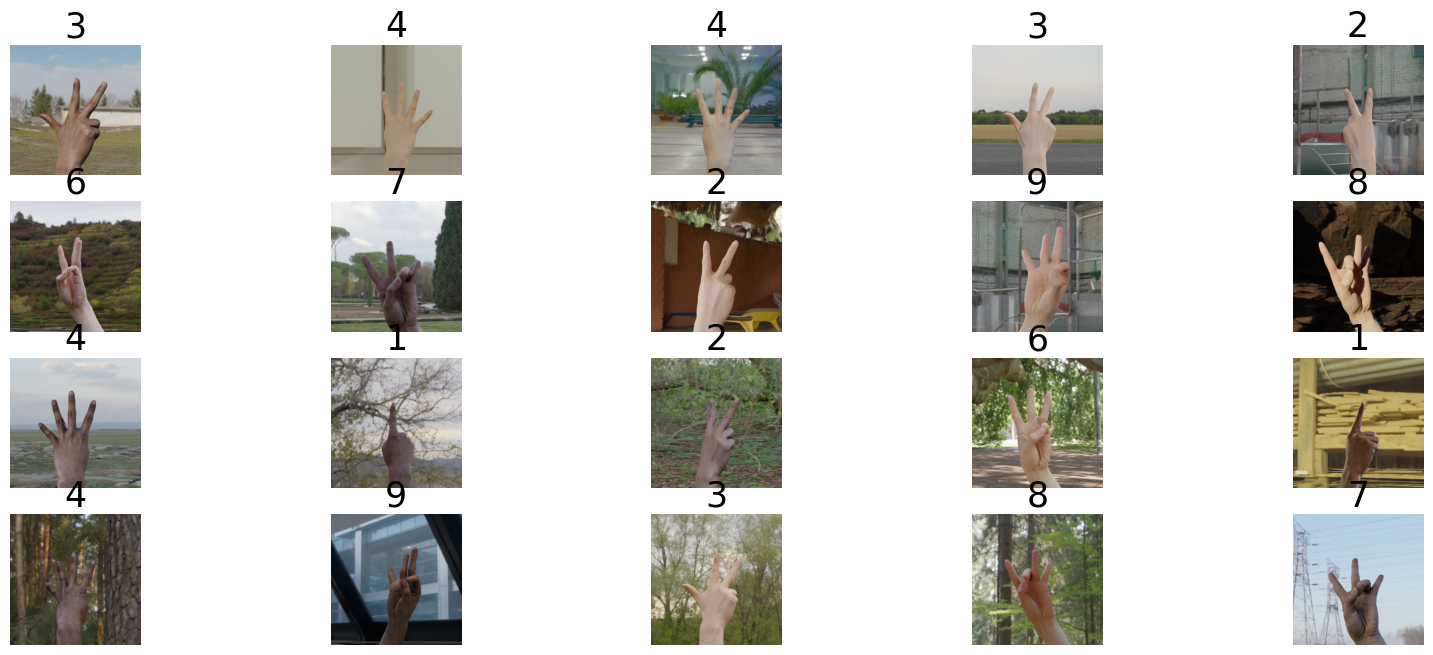

In [5]:
plt.figure(figsize=(20,20))
for n,i in enumerate(np.random.randint(0,len(train_df),20)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train_df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(train_df.label[i],fontsize=25)

In [6]:
for subfolder in test_root_dir: 
      subfolder_path = os.path.join(test_dir_path, subfolder) 
      print(subfolder_path)
      if not os.path.isdir(subfolder_path) or subfolder =='test' :
          continue
      for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        test_images.append(image_path)
        test_labels.append(subfolder)
test_df = pd.DataFrame({'image': test_images, 'label': test_labels})
test_df

./Dataset/test\0
./Dataset/test\1
./Dataset/test\2
./Dataset/test\3
./Dataset/test\4
./Dataset/test\5
./Dataset/test\6
./Dataset/test\7
./Dataset/test\8
./Dataset/test\9


,image,label
0,./Dataset/test\0\1728040245461.jpg,0
1,./Dataset/test\0\1728040245958.jpg,0
2,./Dataset/test\0\1728040245980.jpg,0
3,./Dataset/test\0\1728040245983.jpg,0
4,./Dataset/test\0\1728040245997.jpg,0
...,...,...
945,./Dataset/test\9\f67ac36a-2b33-437e-a6e7-f262d...,9
946,./Dataset/test\9\f71dc471-27e3-4bd3-91bd-ba888...,9
947,./Dataset/test\9\fb093e16-9b89-41b7-a851-ddf00...,9
948,./Dataset/test\9\fd96eb23-d60d-4384-8540-96f6e...,9


C:\Users\Admin\AppData\Local\Temp\ipykernel_24852\2907495688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=test_df.label, palette='Set1')


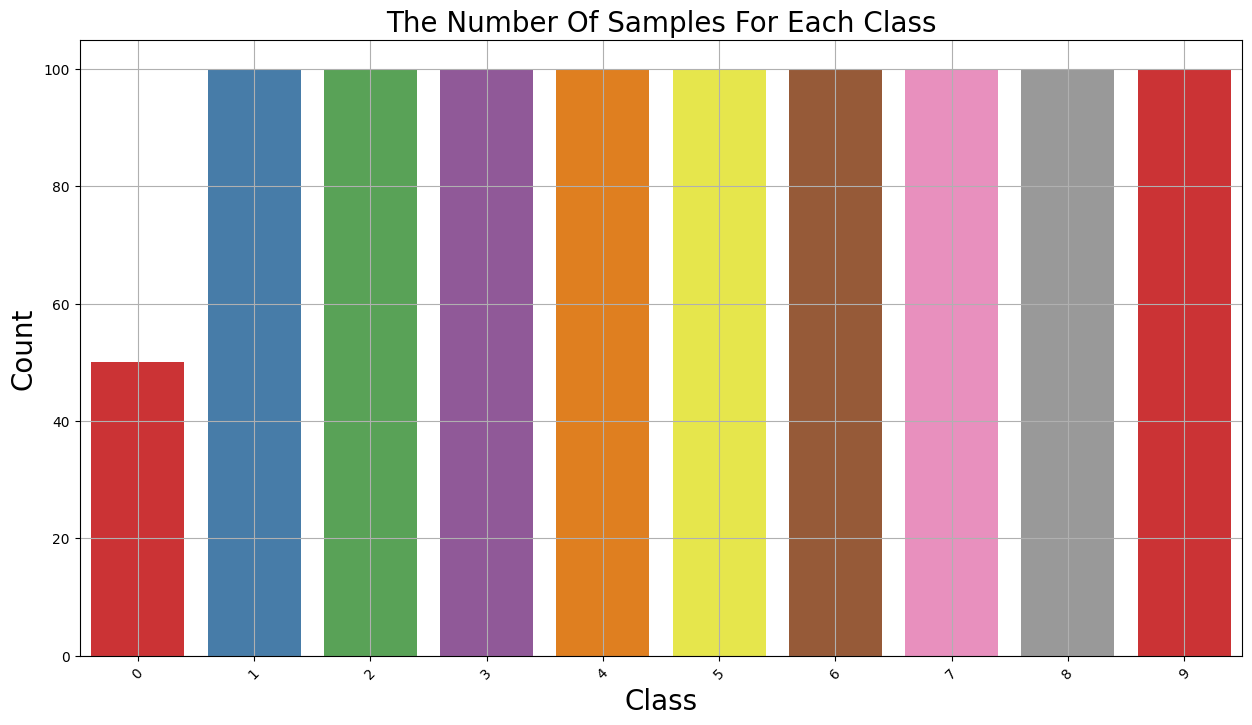

In [7]:
test_df['label'] = pd.Categorical(test_df['label'], categories=sorted(test_df['label'].unique()), ordered=True)

plt.figure(figsize=(15,8))
ax = sns.countplot(x=test_df.label, palette='Set1')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [8]:
# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

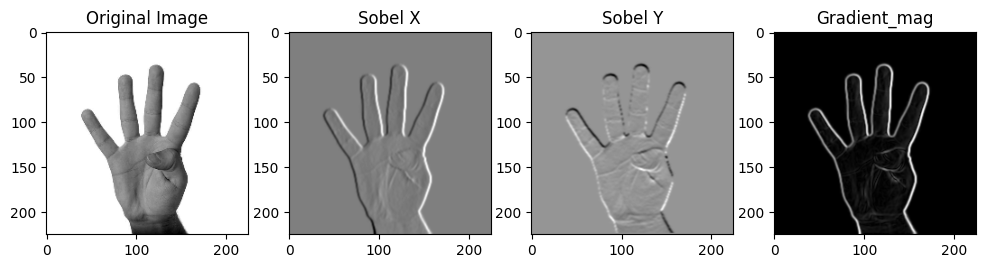

In [12]:
# Ví dụ về bộ lọc SOBEL
img = cv2.imread('./Dataset/so-4.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (225, 225))

# Áp dụng bộ lọc Sobel 
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
# Tính độ lớn gradient
gradient_mag = np.sqrt(sobel_x**2 + sobel_y**2)    
    
# Hiển thị kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Gradient_mag')
plt.imshow(gradient_mag, cmap='gray')

plt.show()

In [10]:
# Function to compute Sobel edge features for an image
def compute_sobel_features(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (128, 128))  

    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(img_resized, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(img_resized, cv2.CV_64F, 0, 1, ksize=5)
    gradient_mag = np.sqrt(sobel_x**2 + sobel_y**2)    

    return gradient_mag.flatten()


In [11]:

def compute_sobel_parallel(images, num_threads=8):
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        return list(executor.map(compute_sobel_features, images))

# Tính toán đặc trưng Sobel cho tập train và test
train_images_sobel = compute_sobel_parallel(train_images)
test_images_sobel = compute_sobel_parallel(test_images)


In [14]:
# Initialize SVM classifier
svm_with_sobel = SVC(C=1, kernel='linear')

In [13]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(svm.SVC(gamma='auto'), {
#     'C': [1,10,20],
#     'kernel': ['linear']
# }, cv=5, return_train_score=False)
# clf.fit(train_images_sobel,train_labels)
# clf.cv_results_